Imports

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models

Data Processing

In [2]:
filelist = []

import os
for dirname, _, filenames in os.walk(r"C:\Users\arthu\Desktop\dataset"):
    for filename in filenames:        
        filelist.append(os.path.join(dirname, filename))

In [3]:
labels = []
images = []
for image_path in filelist:
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = np.array(image)
    image = image/255 #Normalization
    
    image_label = image_path.split("\\")[-1].split(".")[0]
    
    images.append(image)
    labels.append(image_label)

In [4]:
images = np.stack(images)
print(images.shape)

(73062, 40, 150, 3)


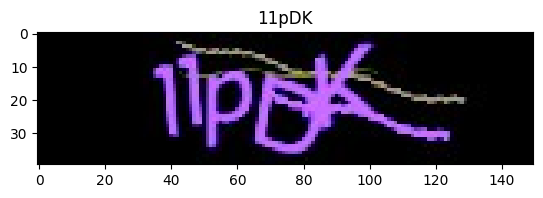

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [5]:
plt.imshow(images[19])
plt.title(labels[19])
plt.axis('on')  # Turn off axis labels
plt.show()

print(images[19])

In [6]:
#One-Hot Encoding List of 5 character strings
def one_hot_encode(characters, char_pool):
    char_to_index = {char: i for i, char in enumerate(char_pool)}
    num_classes = len(char_pool)
    encoding_size = len(characters[0])
    
    one_hot_encoded = np.zeros((len(characters), encoding_size, num_classes), dtype=int)

    for i, word in enumerate(characters):
        for j, char in enumerate(word):
            index = char_to_index[char]
            one_hot_encoded[i, j, index] = 1

    return one_hot_encoded

# Character pool: digits 0-9 and lowercase letters a-z
char_pool = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

# List of 5-letter strings
strings_list = ["abdy6", "ajyt8"]

# One-hot encode the list
one_hot_encoded = one_hot_encode(strings_list, char_pool)

# Print the one-hot encoded representation
print("One-Hot Encoded:")
print(one_hot_encoded)

One-Hot Encoded:
[[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [7]:
#Encoding Labels
encoded_labels = one_hot_encode(labels, char_pool)
encoded_labels = np.array(encoded_labels)
encoded_labels.shape, encoded_labels

((73062, 5, 62),
 array([[[0, 1, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 1, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 1, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 1],
 

In [8]:
#Shuffling Array
indices = np.random.permutation(len(labels))

images = images[indices]
encoded_labels = encoded_labels[indices]

images.shape, encoded_labels.shape

((73062, 40, 150, 3), (73062, 5, 62))

In [9]:
#Train-Validation Split
split_index = int(len(labels) * 0.9)

train_labels = encoded_labels[:split_index]
val_labels = encoded_labels[split_index:]

train_images = images[:split_index]
val_images = images[split_index:]

Creating Model

In [10]:
# Convolutional Layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(40, 150, 3)))  # Ajuste de input_shape
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 36, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 34, 64)         36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [12]:
#Dense Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5 * 36, activation='softmax'))
model.add(layers.Reshape((5, 36)))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 36, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 34, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 13056)             0

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training

In [15]:
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(val_images, val_labels))

Epoch 1/100


ValueError: in user code:

    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\arthu\anaconda3\envs\py38\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5, 62) and (None, 5, 36) are incompatible


In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Plot both training and validation loss curves
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()